## Import necessary libraries for data analysis and visualization

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the csv file into pandas Dataframe

In [16]:
df = pd.read_csv("./train.csv")
df

,video_id,time,event,event_attributes
0,1606b0e6_0,200.265822,start,NaN
1,1606b0e6_0,201.150000,challenge,['ball_action_forced']
2,1606b0e6_0,202.765822,end,NaN
3,1606b0e6_0,210.124111,start,NaN
4,1606b0e6_0,210.870000,challenge,['opponent_dispossessed']
...,...,...,...,...
11213,ecf251d4_0,3056.587000,challenge,['opponent_dispossessed']
11214,ecf251d4_0,3058.072895,end,NaN
11215,ecf251d4_0,3068.280519,start,NaN
11216,ecf251d4_0,3069.547000,throwin,['pass']


## Dataset Descirption

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11218 entries, 0 to 11217
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   video_id          11218 non-null  object 
 1   time              11218 non-null  float64
 2   event             11218 non-null  object 
 3   event_attributes  4382 non-null   object 
dtypes: float64(1), object(3)
memory usage: 350.7+ KB


In [19]:
df.head()

,video_id,time,event,event_attributes
0,1606b0e6_0,200.265822,start,NaN
1,1606b0e6_0,201.150000,challenge,['ball_action_forced']
2,1606b0e6_0,202.765822,end,NaN
3,1606b0e6_0,210.124111,start,NaN
4,1606b0e6_0,210.870000,challenge,['opponent_dispossessed']


In [20]:
df.describe()

,time
count,11218.000000
mean,1787.796418
std,860.845970
min,175.025822
25%,1050.635250
50%,1769.089449
75%,2527.932750
max,3575.000727


## Looking for unique values

In [22]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

video_id: 12 unique values
time: 11204 unique values
event: 5 unique values
event_attributes: 14 unique values


In [28]:
df['event'].unique()

array(['start', 'challenge', 'end', 'throwin', 'play'], dtype=object)

In [27]:
df['event_attributes'].unique()

array([nan, "['ball_action_forced']", "['opponent_dispossessed']",
       "['pass']", "['pass', 'openplay']", "['cross', 'openplay']",
       "['possession_retained']", "['pass', 'freekick']", "['cross']",
       "['fouled']", "['opponent_rounded']", "['cross', 'corner']",
       "['challenge_during_ball_transfer']", "['cross', 'freekick']",
       "['pass', 'corner']"], dtype=object)

## Event Distribution

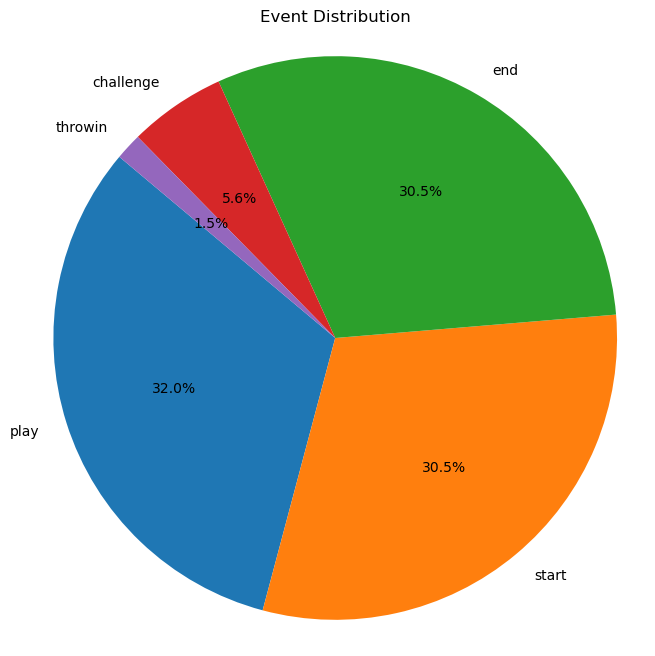

In [45]:
plt.figure(figsize=(8, 8))
event_counts = df['event'].value_counts()
plt.pie(event_counts, labels=event_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Event Distribution')
plt.axis('equal')
plt.show()


## Video Distribution

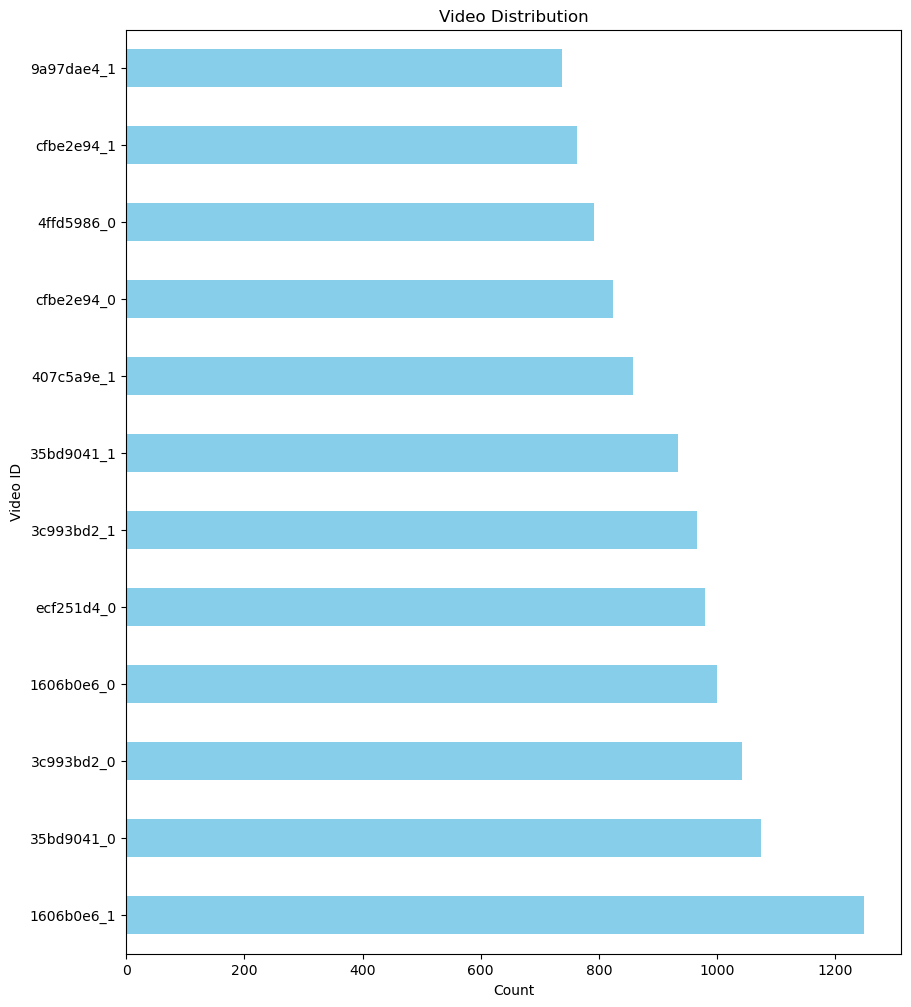

In [46]:
plt.figure(figsize=(10, 12))
video_counts = df['video_id'].value_counts()
video_counts.plot(kind='barh', color='skyblue')
plt.title('Video Distribution')
plt.xlabel('Count')
plt.ylabel('Video ID')
plt.show()

## Video Distribution Excluding 'Start' and 'End' Events

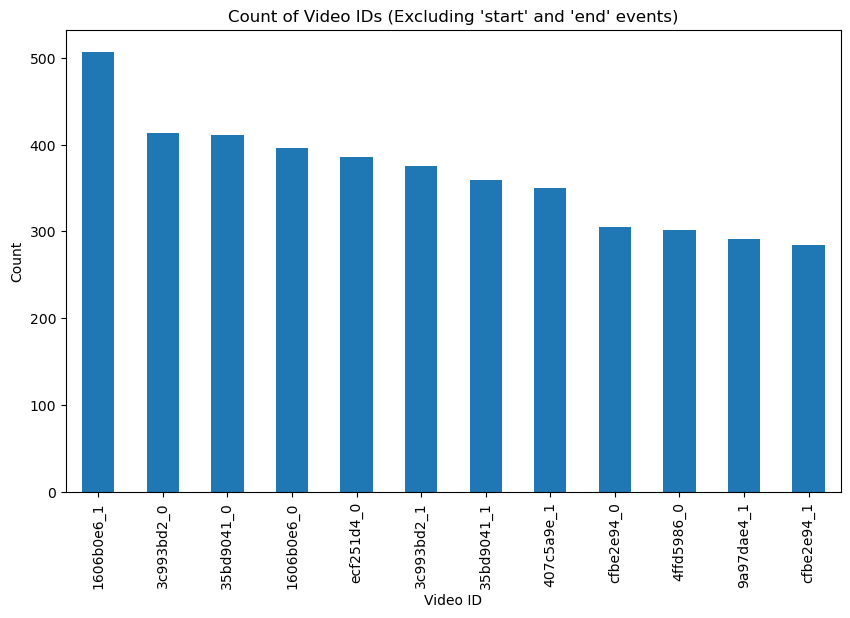

In [49]:
plt.figure(figsize=(10, 6))
df_filtered = df[(df["event"] != "start") & (df["event"] != "end")]
video_id_counts = df_filtered["video_id"].value_counts()
video_id_counts.plot(kind="bar")
plt.title("Count of Video IDs (Excluding 'start' and 'end' events)")
plt.xlabel("Video ID")
plt.ylabel("Count")
plt.show()

## Event "Challenge" Analysis

In [29]:
df_challenge = df[df["event"] == "challenge"].reset_index()

<Axes: title={'center': 'Challenge Event - Attributes Distribution'}, xlabel='count', ylabel='event_attributes'>

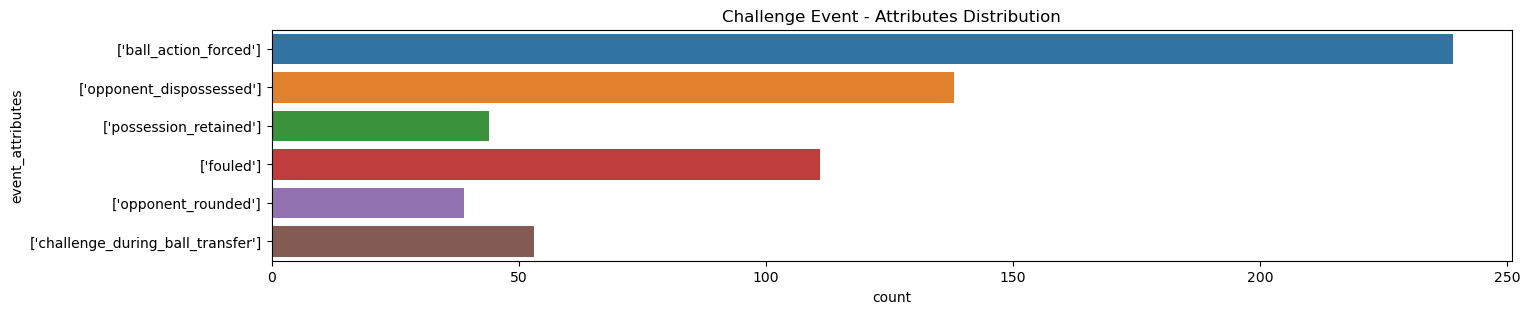

In [33]:
plt.figure(figsize=(16, 3))
plt.title("Challenge Event - Attributes Distribution")
sns.countplot(data=df_challenge, y="event_attributes")

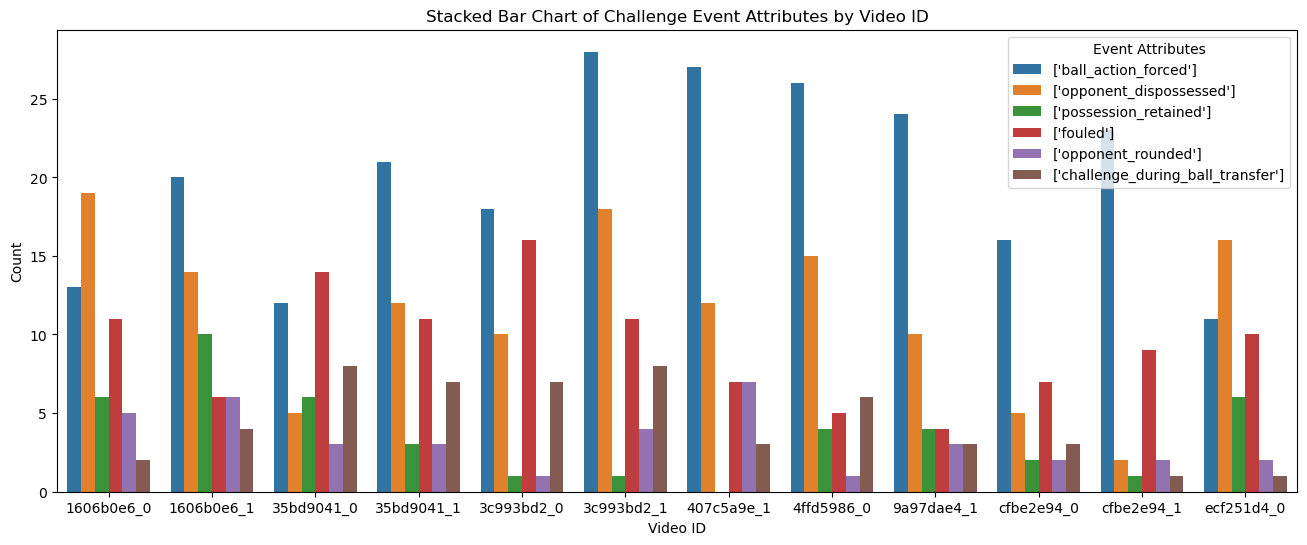

In [34]:
plt.figure(figsize=(16, 6))
sns.countplot(data=df_challenge, x="video_id", hue="event_attributes")
plt.title('Stacked Bar Chart of Challenge Event Attributes by Video ID')
plt.xlabel('Video ID')
plt.ylabel('Count')
plt.legend(title='Event Attributes')
plt.show()

## Event "Throw-in" Analysis

In [35]:
df_throwin = df[df["event"] == "throwin"].reset_index()

<Axes: title={'center': 'Thown-in Event - Attributes Distribution'}, xlabel='count', ylabel='event_attributes'>

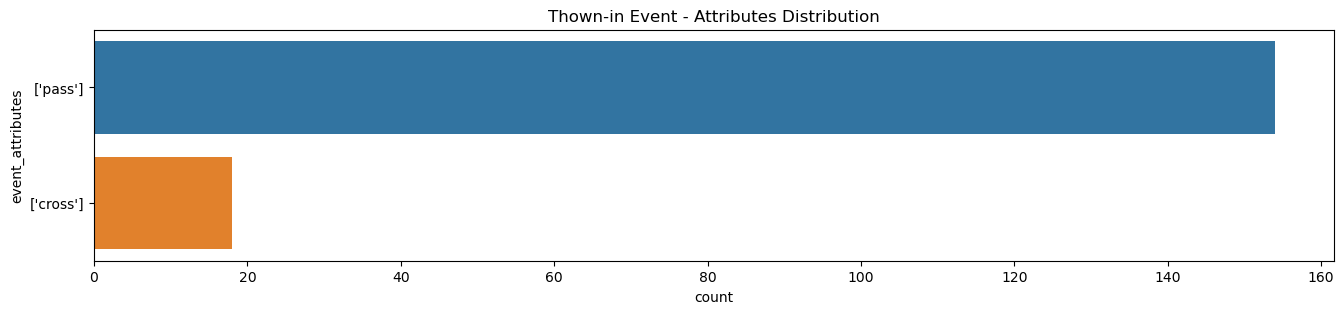

In [36]:
plt.figure(figsize=(16, 3))
plt.title("Thown-in Event - Attributes Distribution")
sns.countplot(data=df_throwin, y="event_attributes")

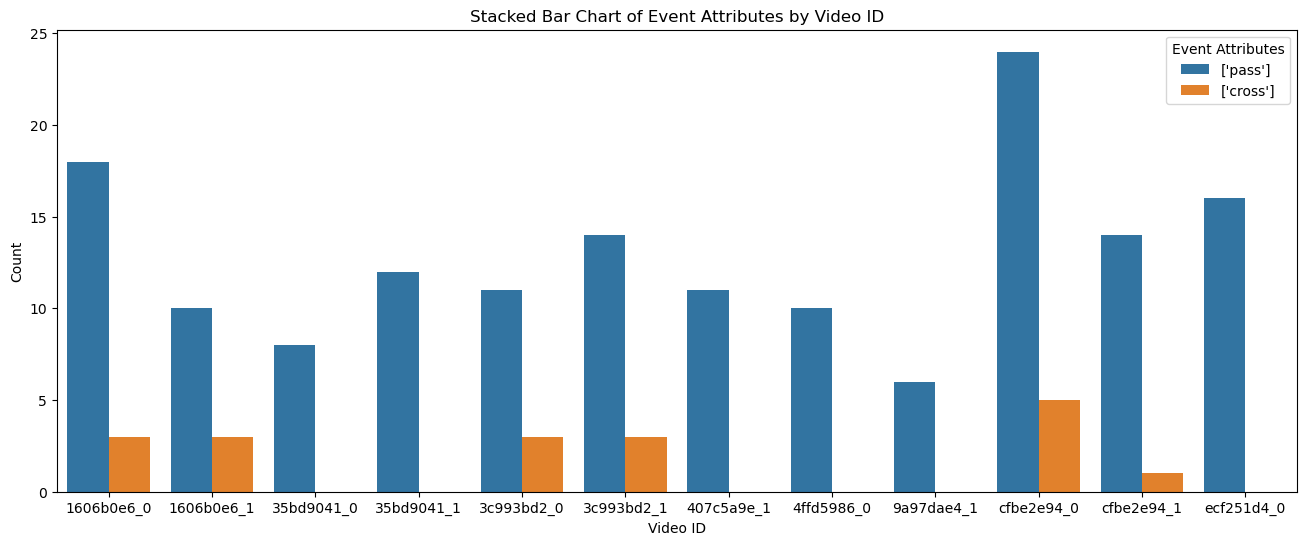

In [37]:
plt.figure(figsize=(16, 6))
sns.countplot(data=df_throwin, x="video_id", hue="event_attributes")
plt.title('Stacked Bar Chart of Event Attributes by Video ID')
plt.xlabel('Video ID')
plt.ylabel('Count')
plt.legend(title='Event Attributes')
plt.show()

## Event "Play" Analysis

In [50]:
df_play = df[df["event"] == "play"].reset_index()

<Axes: title={'center': 'Play Event - Attributes Distribution'}, xlabel='count', ylabel='event_attributes'>

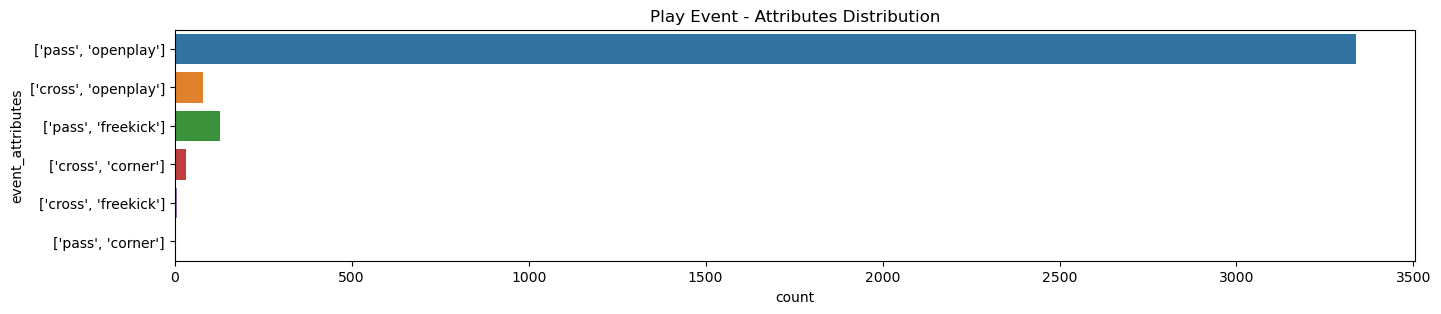

In [51]:
plt.figure(figsize=(16, 3))
plt.title("Play Event - Attributes Distribution")
sns.countplot(data=df_play, y="event_attributes")

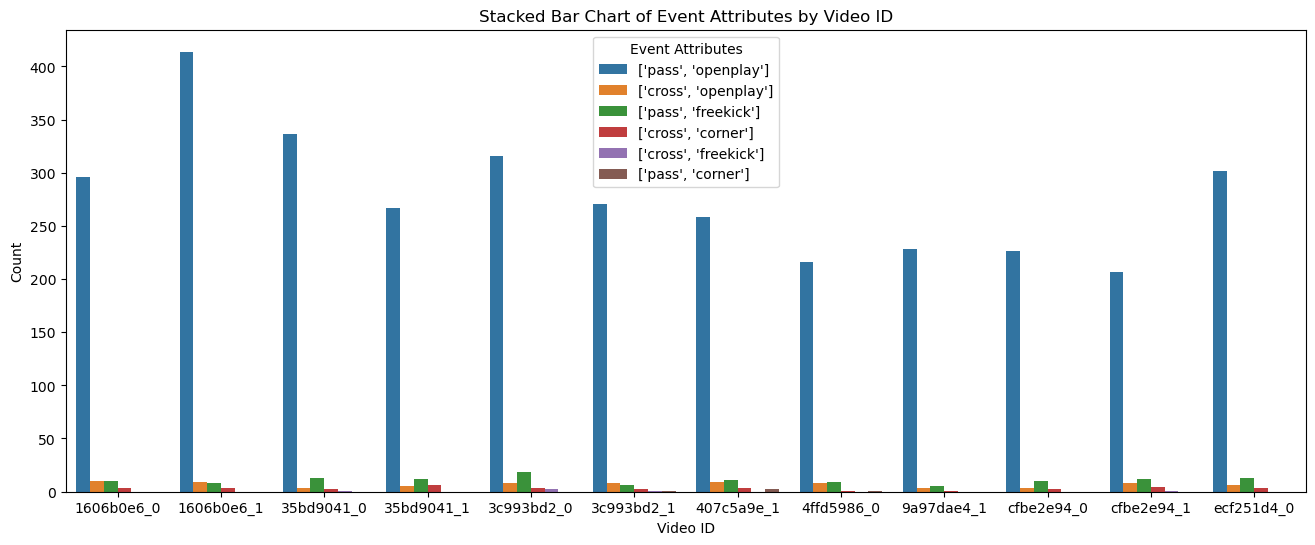

In [52]:
plt.figure(figsize=(16, 6))
sns.countplot(data=df_play, x="video_id", hue="event_attributes")
plt.title('Stacked Bar Chart of Event Attributes by Video ID')
plt.xlabel('Video ID')
plt.ylabel('Count')
plt.legend(title='Event Attributes')
plt.show()